>
# Project: Investigate a Dataset (No Show appoitments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project's goal is to investigate a dataset that contains 110527 medical appointments its 12 associated variables. The purpose of this dataset is to find why a patient schedules a doctor's appointment, obtains all necessary information and then fails to show up. The vital variable here is (NO Show). Hence, this project will analyze the relationship between this characteristic with the other provided ones.

> The variables means: 
>- **PatientId**: Identification of a patient.
>- **Gender**: Male or Female.
>- **Age**: How old is the patient.
>- **Neighbourhood**: Where the appointment takes place.
>- **Scholarship**: Program of the Government of Brazil, part of the Fome Zero network of federal assistance programs.
>- **Hipertension**: True or False.
>- **Diabetes**: True or False.
>- **Alcoholism**: True or False.
>- **Handcap**: True or False.
>- **SMS_received**: 1 or more messages sent to the patient..
>- **No-show**: True or False.
### Research Questions
>The main questions that this analysis will focus on are as follow:
>1. Do Weekends have a better showing up probability than weekdays?
>2. Do people tend to show up on the same day of scheduling?
>3. DO SMS notifications affect the percentage of showing up?
>4. Does gender play any role in committing to a medical appointment?
>5. Do scholarship, Age, Handicap & Alcoholism affect the probability of patients showing up?


In [83]:

#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, the data will be cleaned and prepared to be analyzed. 

### General Properties

In [84]:
#Loading the data set:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 

In [85]:
#Inspecting the data
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [86]:
#The number of samples and coulmns
df.shape

(110527, 14)

In [87]:
#Informations about the non-null data and the type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [88]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [89]:
# checking the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [90]:
#checking for the duplication
df.duplicated().sum()

0

In [91]:
#Checking for the null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [92]:
# checking datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [93]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Notes 
>There are no missing or duplicated values, but some problems have been noticed with the data set that needs to be fixed in the cleaning phase. Each one will be handled in detail. 

### Data Cleaning 

#### Problem one
>The names of the columns need to be more consistent, including underscore, lower, and some spelling mistakes need corrections: handcap :handicap.

In [94]:
# Replace - with _ and lowercase labels for the dataset
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [95]:
# Making sure that the changes are applied
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [96]:
# Renaming the handicab column
df.rename(columns={'handcap': 'handicap'}, inplace=True)

In [97]:
# Making sure that the changes are applied
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [98]:
# Renaming the appointmentday and scheduledday columns
df.rename(columns={'appointmentday': 'appointment_day', 'scheduledday': 'scheduled_day'}, inplace=True)

In [99]:
# Making sure that the changes are applied
df.head(1)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Problem two 
>The columns scheduled_day and appointment_day type must be changed to date type.

>[Reference1](https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/)

In [100]:
# Using astype function to convert the columns from string to datetime type.
df['appointment_day'] = df['appointment_day'].astype('datetime64[ns]')
df['scheduled_day'] = df['scheduled_day'].astype('datetime64[ns]')

In [101]:
# Checking the types
df.dtypes

patientid                 float64
appointmentid               int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

In [102]:
# Making sure that the changes are applied
df['appointment_day'].head()
df['scheduled_day'].head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: scheduled_day, dtype: datetime64[ns]

In [103]:
# elimnationg time and keeping only the date from the scheduled_day using to_date function
# this step is required to make the comparison between scheduled_day and appointment_day easy
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['scheduled_day'].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: scheduled_day, dtype: object

#### Problem three
>The min and max values in the age column have(-1,115). Hence, this indicates that the age column may have wrong entries, so we need to check the consistency of the age values. 

In [104]:
#checking all the negative values in the age column 
df.loc[df['age'] < 0]

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


> The previous cell shows that there is only one record with negative age; as a result, this row will be dropped because it indicates this record was entered incorrectly.

In [105]:
# Droping the index 99832
df.drop([99832], inplace=True)

In [106]:
# Checking ages > 95 values in the age column 
df.loc[df['age'] > 95]

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
969,1.294694e+14,5588126,F,2016-04-15,2016-04-29,98,BONFIM,0,1,0,0,0,0,Yes
983,8.249688e+13,5520168,M,2016-03-29,2016-04-29,98,SÃO PEDRO,0,1,0,0,0,1,No
5401,3.518546e+11,5675430,M,2016-05-09,2016-05-11,96,JARDIM DA PENHA,0,0,0,0,0,0,No
9437,8.758612e+13,5692481,F,2016-05-12,2016-05-18,96,MARUÍPE,0,1,0,0,0,0,No
14176,1.882198e+11,5732443,F,2016-05-24,2016-05-24,96,JABOUR,0,0,0,0,0,0,No
14345,6.451675e+13,5721500,M,2016-05-19,2016-05-20,96,SANTO ANDRÉ,0,1,0,0,0,0,No
18317,5.659244e+14,5704081,F,2016-05-16,2016-05-16,97,PARQUE MOSCOSO,0,1,1,0,0,0,No
23389,3.794954e+13,5695368,F,2016-05-13,2016-05-13,96,CONSOLAÇÃO,0,1,0,0,1,0,No
24127,5.253828e+14,5682354,F,2016-05-10,2016-05-10,97,SANTA TEREZA,0,1,0,0,0,0,No
24129,5.234117e+14,5664305,F,2016-05-05,2016-05-05,96,DO QUADRO,0,1,0,0,0,0,No


> There is more than one record for people over 95 and 100, and some of the records are repeated for the same patient. In this case, the data will not be considered as mistakes because some rare people may live to over 100.

>[Reference2](https://www.cnbc.com/2020/07/29/people-who-live-100-longer-share-this-hobby-longevity-experts-say-it-can-add-years-to-life.html)

In [107]:
# Checking ages == 0 values in the age column 
df.loc[df['age'] == 0]

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
59,7.184428e+13,5638545,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No


> There are 3539 records with 0 years old! Since age will be a significant independent variable in this analysis, the zero values will be replaced with the age mean value.  

In [108]:
age_mean= int(df['age'].mean())
print("The mean age of the patients is {} years old".format(age_mean))

The mean age of the patients is 37 years old


In [109]:
#replacing the 0 age values with the mean age 
df.age.replace(to_replace=[0], value=[age_mean], inplace=True)

In [110]:
#checking no 0 age in the data set
df[df['age'] == 0]

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show


#### Problem four
> no_show column type is a string as (No, Yes), since this is the primary dependent variable in this project, we need to convert it to bool type to be easier dealing with it.

In [111]:
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

In [112]:
# first, replacing yes,no to 1,0 in the no_show column
df.no_show.replace(to_replace=['No','Yes'], value=[0,1], inplace=True)


In [113]:
df['no_show'].value_counts()

0    88207
1    22319
Name: no_show, dtype: int64

In [114]:
#second, converting the int type to boolean
df['no_show']= df['no_show'].astype('bool')

In [115]:
df['no_show'].value_counts()

False    88207
True     22319
Name: no_show, dtype: int64

> **Checking the  structure of the data so far**

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patientid        110526 non-null  float64       
 1   appointmentid    110526 non-null  int64         
 2   gender           110526 non-null  object        
 3   scheduled_day    110526 non-null  object        
 4   appointment_day  110526 non-null  datetime64[ns]
 5   age              110526 non-null  int64         
 6   neighbourhood    110526 non-null  object        
 7   scholarship      110526 non-null  int64         
 8   hipertension     110526 non-null  int64         
 9   diabetes         110526 non-null  int64         
 10  alcoholism       110526 non-null  int64         
 11  handicap         110526 non-null  int64         
 12  sms_received     110526 non-null  int64         
 13  no_show          110526 non-null  bool          
dtypes: bool(1), datetime

In [117]:
df.nunique()

patientid           62298
appointmentid      110526
gender                  2
scheduled_day         111
appointment_day        27
age                   102
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handicap                5
sms_received            2
no_show                 2
dtype: int64

> It can be noticed that the columns scholarship,alcoholism,sms_received all of them have only 2 values with 0 and 1, hence we can repeat the same step that was done with no_show column and convert them all to the type boolean using for loop.


In [118]:
#converting the columns' type by a loop
cols=['scholarship','alcoholism', 'sms_received']
for column in df[cols]:
    df[cols]= df[cols].astype('bool')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patientid        110526 non-null  float64       
 1   appointmentid    110526 non-null  int64         
 2   gender           110526 non-null  object        
 3   scheduled_day    110526 non-null  object        
 4   appointment_day  110526 non-null  datetime64[ns]
 5   age              110526 non-null  int64         
 6   neighbourhood    110526 non-null  object        
 7   scholarship      110526 non-null  bool          
 8   hipertension     110526 non-null  int64         
 9   diabetes         110526 non-null  int64         
 10  alcoholism       110526 non-null  bool          
 11  handicap         110526 non-null  int64         
 12  sms_received     110526 non-null  bool          
 13  no_show          110526 non-null  bool          
dtypes: bool(4), datetime

#### Problem five
>Now, after fixing the columns labels and the data types, the paitentid,diabetes,hipertension look not very necessary for the analysis.

>Some patients have more than one appointment, as shown when we check the IDs as follows:  

In [120]:
paitensIds= df['patientid'].nunique()
appointmentIds= df['appointmentid'].nunique()
print("There are {} paitens id and {} appointment id".format(paitensIds,appointmentIds))

There are 62298 paitens id and 110526 appointment id


> The last cell indicates that there are some id patients who have repeated appointments. Since this analysis scope is only focused on the appointments, the patient will be drooped, and the appointment will be kept as the unique identifier.

In [121]:
#droping patientid column
df.drop('patientid', axis=1, inplace=True)
df.drop('diabetes', axis=1, inplace=True)
df.drop('hipertension', axis=1, inplace=True)

In [122]:
df.head(1)

,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,alcoholism,handicap,sms_received,no_show
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,0,False,False


In [123]:
df.describe()


,appointmentid,age,handicap
count,1.105260e+05,110526.000000,110526.000000
mean,5.675304e+06,38.273945,0.022248
std,7.129544e+04,22.104819,0.161543
min,5.030230e+06,1.000000,0.000000
25%,5.640285e+06,20.000000,0.000000
50%,5.680572e+06,37.000000,0.000000
75%,5.725523e+06,55.000000,0.000000
max,5.790484e+06,115.000000,4.000000


In [124]:
df.head()

,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,alcoholism,handicap,sms_received,no_show
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,0,False,False
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,0,False,False
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,0,False,False
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,0,False,False
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,0,False,False


#### Problem six
> In the last problem, the dataset needs to have a new column that has the week days.


> [Reference3](https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python)

In [125]:
# Creating the week day column 
df['day_of_week'] = df['appointment_day'].dt.day_name()

In [126]:
df.head()

,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,alcoholism,handicap,sms_received,no_show,day_of_week
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,0,False,False,Friday
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,0,False,False,Friday
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,0,False,False,Friday
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,0,False,False,Friday
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,0,False,False,Friday


In [127]:
df.to_csv('noshowappointments-cleanV-2016.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis
> [Reference](https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/)

> [Reference](https://seaborn.pydata.org/tutorial/categorical.html)


### General Observation 

In [128]:
# Creating a mask for show, not_show
show= df.no_show == False
not_show= df.no_show == True
df.head(1)

,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,alcoholism,handicap,sms_received,no_show,day_of_week
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,False,0,False,False,Friday


>The first step to get an overview of the mean of show/no show:

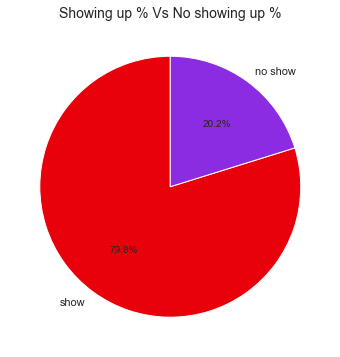

In [129]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ['show', 'no show']
plt.pie(x=df.no_show.value_counts(), autopct="%.1f%%", labels=labels, colors = sns.color_palette('bright')[3:6], startangle=90)
plt.title("Showing up % Vs No showing up %", fontsize=14);
plt.show()

>**explanation**:The overall showing up % is quite good and it means that most of the patients show up for the medical appointments, yet we need to improve this % and make sure that more patients show up.

>The second step to get an overview of the age using box plot:

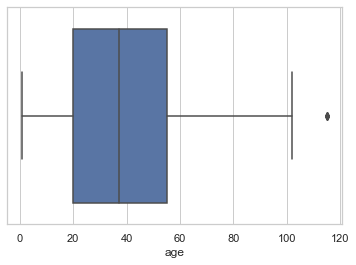

In [130]:
#using seaborn box plot
ax = sns.boxplot(x=df["age"])

>**explanation**:The mean age is 37 years old; some outliers are the people who have rare age above 100 years old. The youngest patients are one year old. The most common age interval falls between the 20s and 50s.

>The third step to get an overview of the gender using countplot:

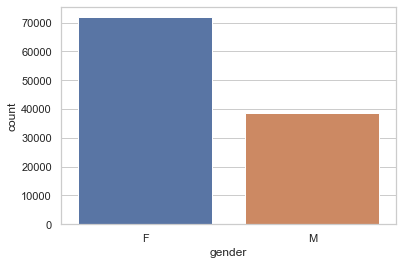

In [131]:
ax = sns.countplot(x="gender", data=df)

>**explanation**:The number of female patients is higher than male patients.

>The fourth step is to get an overview of which gender has applied to the scholarship:

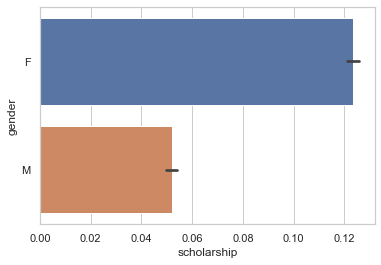

In [132]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="scholarship", y="gender", data=df)

>**explanation**:The number of female patients is higher than male patients who apllied for the scholarship.

### Research questions

### 1.Do Weekends have a better showing up probability than weekdays?

Wednesday    20774
Tuesday      20488
Monday       18024
Friday       14982
Thursday     13909
Saturday        30
Name: day_of_week, dtype: int64


Tuesday      5152
Wednesday    5093
Monday       4690
Friday       4037
Thursday     3338
Saturday        9
Name: day_of_week, dtype: int64


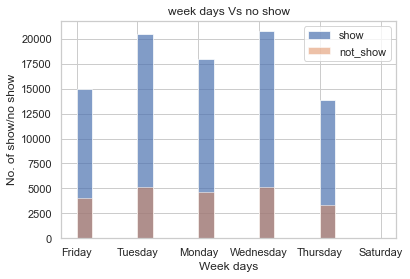

In [133]:
# Counting and plotting the patients numbers by the mask
print(df.day_of_week[show].value_counts())
print('\n')
print(df.day_of_week[not_show].value_counts())
#Using matplotlib
df.day_of_week[show].hist(alpha=0.7, bins=20, label='show')
df.day_of_week[not_show].hist(alpha=0.5, bins=20, label='not_show')
plt.title("week days Vs no show")
plt.xlabel("Week days")
plt.ylabel("No. of show/no show")
plt.legend();

> **explanation**: This graph shows the distrbution of the number of patients trough the week to get a bird eye view of the higet showing up days. Hence the graph concluded that weekends do not have better showing up probability than weekdays.

### 2.Do people tend to show up on the same day of scheduling?

The % of show/no_show if the appotiment day as the same day of scheduling:

False    41.686034
True      8.029034
Name: no_show, dtype: float64
The number appotiment day as the same day of scheduling:
38562
The % of show/no_show if the appotiment day not the same day of scheduling:

False    58.313966
True     91.970966
Name: no_show, dtype: float64
The number appotiment day not the same day of scheduling:
71964


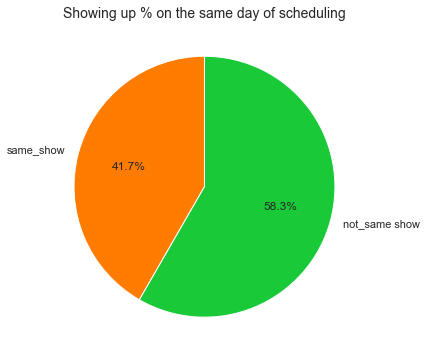

In [134]:
#Creating two data frames:
# data frame has the appotiment day as the same day of scheduling
dfc=df[df.scheduled_day == df.appointment_day]
print("The % of show/no_show if the appotiment day as the same day of scheduling:\n")
same_show=dfc['no_show'].value_counts()/df['no_show'].value_counts()*100
print(same_show)
print("The number appotiment day as the same day of scheduling:")
print(dfc['no_show'].value_counts().sum())

# data frame has the appotiment day not the same day of scheduling
dfx=df[df.scheduled_day != df.appointment_day]
print("The % of show/no_show if the appotiment day not the same day of scheduling:\n")
not_same_show=dfx['no_show'].value_counts()/df['no_show'].value_counts()*100
print(not_same_show)
print("The number appotiment day not the same day of scheduling:")
print(dfx['no_show'].value_counts().sum())
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ['same_show', 'not_same show']
plt.pie(x=[same_show[0], not_same_show[0]], autopct="%.1f%%", labels=labels, colors = sns.color_palette('bright')[1:4], startangle=90)
plt.title("Showing up % on the same day of scheduling", fontsize=14);
plt.show()

>**explanation**: This graph shows the % of the number of patients showed up on the same day of scheduling vs not same day of scheduling, many calcultaions and steps were required to reach this final graph; it illustrates that most likely patients (58.3%) prefer set up their appointmet early with higer chance to show up. 

### 3.DO SMS notifications affect the percentage of showing up?


The mean of the number of people who recived sms and showed is 0.29133742220005215

The mean of the number of people who recived sms and not showed is 0.43837089475334917



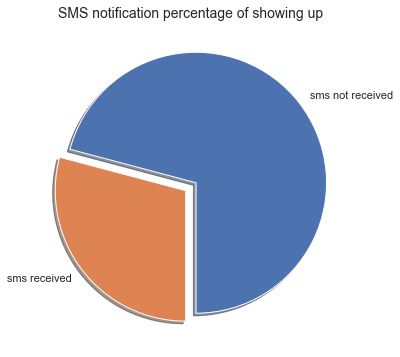

In [135]:
#SMS notificationsmean and plotting by the mask
mean_recived_show=df.sms_received[show].mean()
mean_recived_notshow=df.sms_received[not_show].mean()
print('The mean of the number of people who recived sms and showed is {}\n'.format(mean_recived_show))
print('The mean of the number of people who recived sms and not showed is {}\n'.format(mean_recived_notshow))
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ['sms not received', 'sms received']
plt.pie(x=df.sms_received[show].value_counts(), explode=[0.05]*2, labels=labels, pctdistance=0.5, shadow=True, startangle=270)
plt.title("SMS notification percentage of showing up", fontsize=14);
plt.show()

>**explanation**: This graph shows if the SMS reminders are important factor for patients to show up. But surprisingly the graph showed that the number of people who got sms reminders and showed up are less than the number of who did not git SMS and showed. also the mean showed that 43.8% of people recived sms and not showed. on the other hand only 29.1% who recived showed up.

### 4.Does gender play any role in committing to a medical appointment?

The % of femals who showed is 79.68512924734476 : not showed is 20.314870752655242
The % of males who showed is 80.03205211052808 : not showed is 19.967947889471915


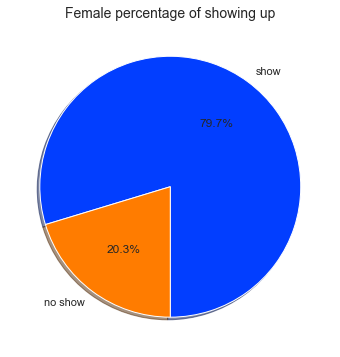

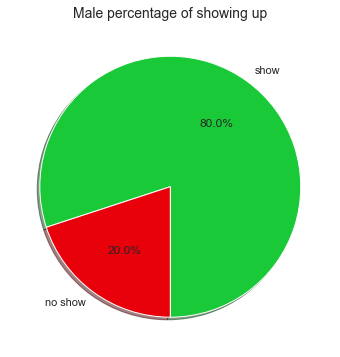

In [136]:
#calcluating the % of show/no show for femals and males
F_show=(df.gender[show].value_counts()/df.gender.value_counts()*100)[0]
F_noshow=(df.gender[not_show].value_counts()/df.gender.value_counts()*100)[0]
M_show=(df.gender[show].value_counts()/df.gender.value_counts()*100)[1]
M_noshow=(df.gender[not_show].value_counts()/df.gender.value_counts()*100)[1]
print('The % of femals who showed is {} : not showed is {}'.format(F_show, F_noshow))
print('The % of males who showed is {} : not showed is {}'.format(M_show, M_noshow))
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ['show', 'no show']
plt.pie(x=[F_show, F_noshow], autopct="%.1f%%", labels=labels, colors = sns.color_palette('bright')[0:5], shadow=True, startangle=270)
plt.title("Female percentage of showing up", fontsize=14);
plt.show()
pie, ax = plt.subplots(figsize=[10,6])
labels = ['show', 'no show']
plt.pie(x=[M_show, M_noshow], autopct="%.1f%%", labels=labels, colors = sns.color_palette('bright')[2:5], shadow=True, startangle=270)
plt.title("Male percentage of showing up", fontsize=14);
plt.show()

>**explanation**: Both graphs show that males and females have approximately the same % of showing/not showig. These graphs also required some calculations to reach this conclusion(gender does not play in role  in committing to a medical appointment).

###  5.	Do Scholarship, Age, Handicap & Alcoholism affect the probability of patients showing up?

scholarship  no_show
False        False      79924
             True       19741
True         False       8283
             True        2578
Name: no_show, dtype: int64


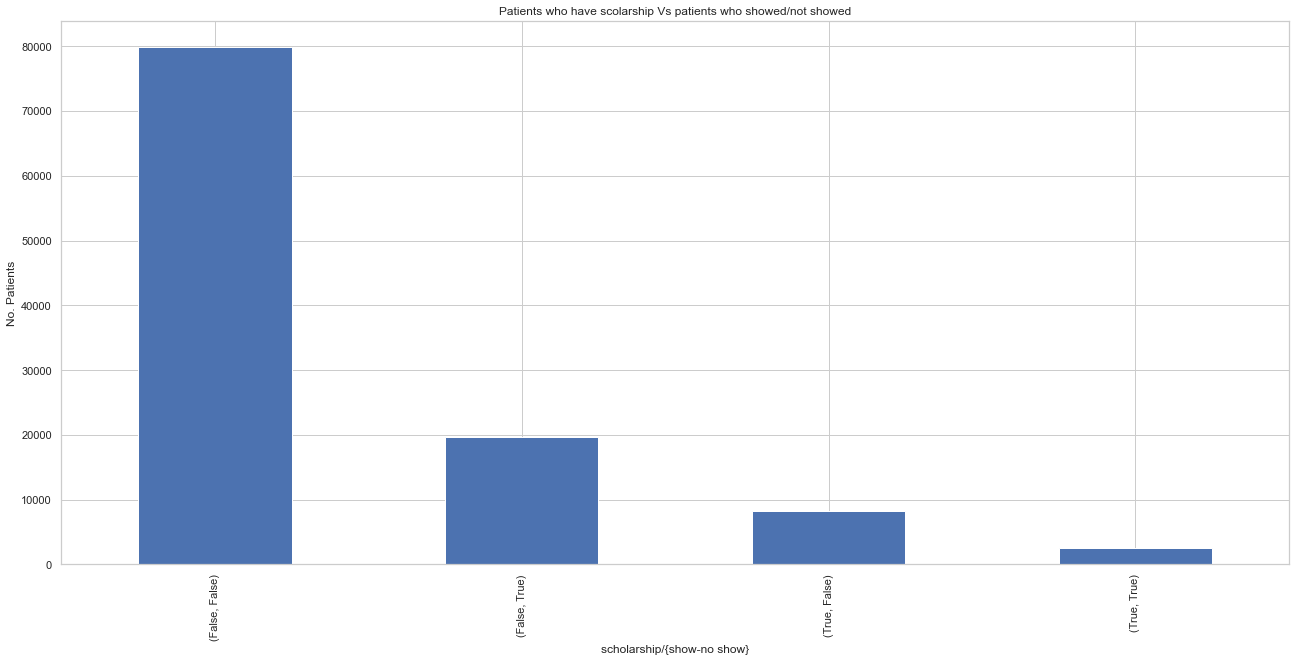

In [137]:
#Scholarship
print(df.groupby('scholarship')['no_show'].value_counts())
df.groupby('scholarship')['no_show'].value_counts().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("scholarship/{show-no show}")
plt.ylabel("No. Patients")
plt.title("Patients who have scolarship Vs patients who showed/not showed");

>**explanation**:This graph shows the overall view of patients with scholarship relations. It can be noticed that most of the patients who showed up did not have the scholarship. Also, the number of patients who had a scholarship showed is more than the number of people who had and did not show. But the graph illustrates that scholarship does not affect the % of showing up generally.

count    110526.000000
mean         38.273945
std          22.104819
min           1.000000
25%          20.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


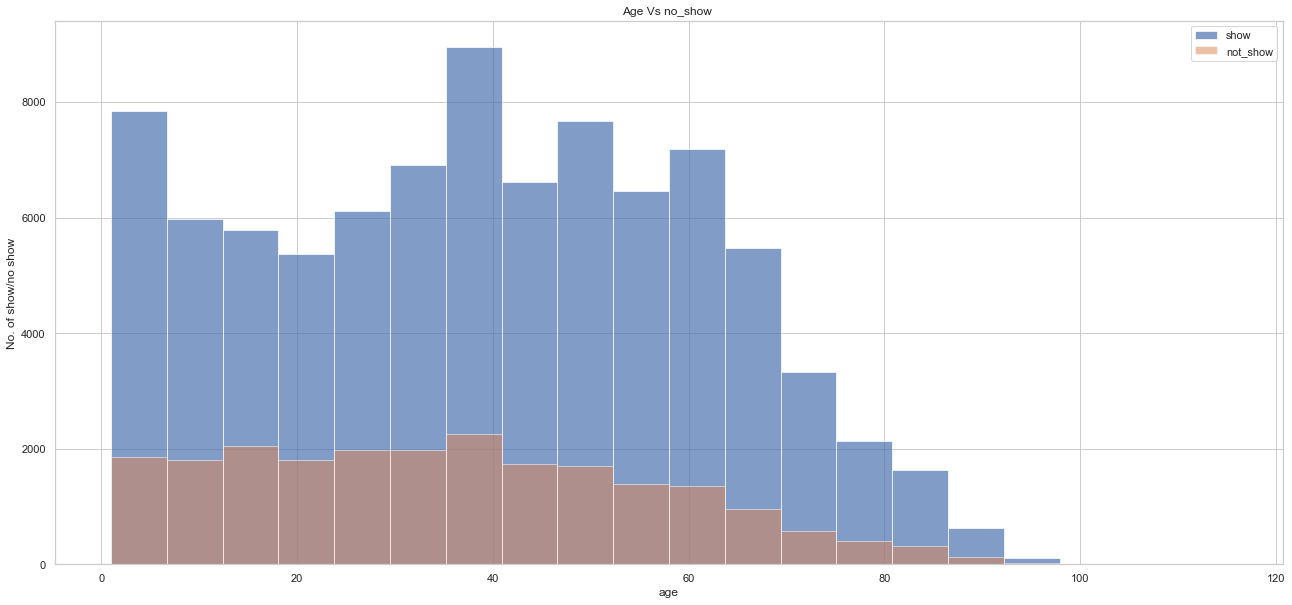

The number of patients who showed and youger than 37 is 43543
The number of patients who showed and older than 37 is 44664


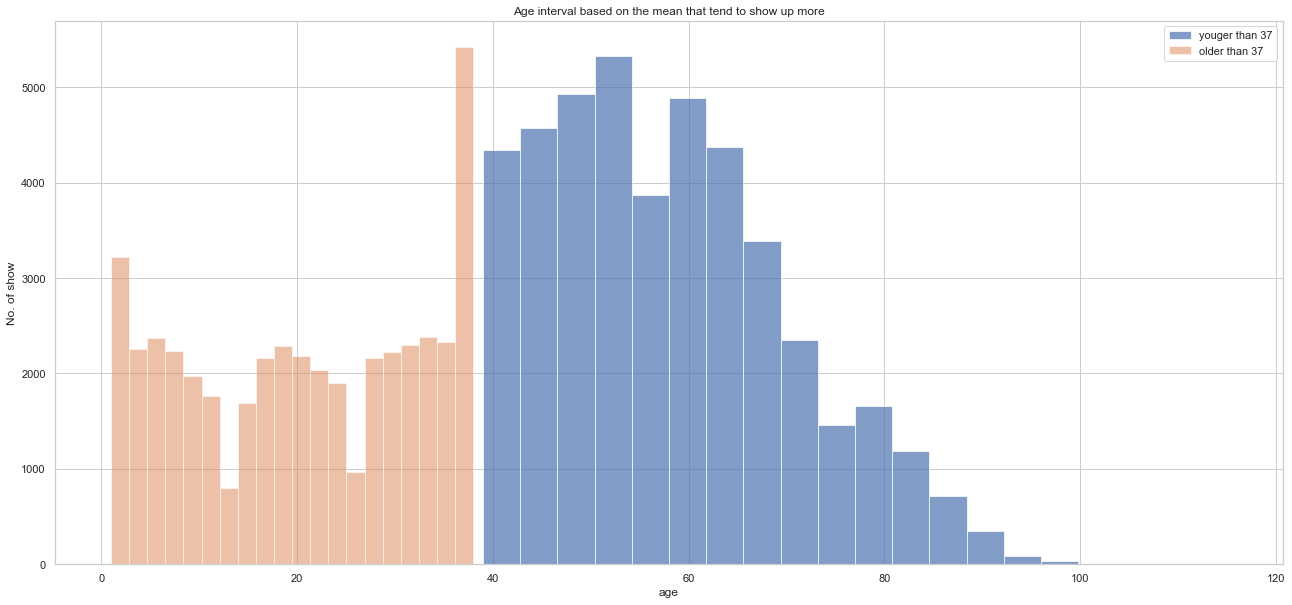

In [138]:
#Age
print(df.age.describe())
#Using matplotlib to get an overview 
df.age[show].hist(alpha=0.7, bins=20, label='show',figsize=(22,10))
df.age[not_show].hist(alpha=0.5, bins=20, label='not_show',figsize=(22,10))
plt.title("Age Vs no_show ")
plt.xlabel("age")
plt.ylabel("No. of show/no show")
plt.legend()
plt.show();
#Figuring the age interval based on the mean that showing up more
#Creating two dataframes
#all the ages less than the mean age and showed up
dfm= df[df['age'] > df.age.mean()]
print('The number of patients who showed and youger than 37 is {}'.format(dfm.age[show].value_counts().sum()))
#all the ages more than the mean age and showed up
dfn= df[df['age'] <= df.age.mean()]
print('The number of patients who showed and older than 37 is {}'.format(dfn.age[show].value_counts().sum()))
dfm.age[show].hist(alpha=0.7, bins=20, label='youger than 37',figsize=(22,10))
dfn.age[show].hist(alpha=0.5, bins=20, label='older than 37',figsize=(22,10))
plt.title("Age interval based on the mean that tend to show up more")
plt.xlabel("age")
plt.ylabel("No. of show")
plt.legend();

>**explanation**:The first graph shows the overall distribution of patients' ages, the show/no show numbers, and it can be noticed that the highest showing up records for people under 15 and people above 35 and under 40. The second graph also shows that patients who showed and older than the mean are more than the younger people. 

In [139]:
#Handicap
print(df['handicap'].value_counts())

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64


In [140]:
#we need to combine the categories from 1 to 4 into one column
df['handicap'] = df['handicap'].astype('bool')
print(df['handicap'].value_counts())

False    108285
True       2241
Name: handicap, dtype: int64


handicap  no_show
False     False      86373
          True       21912
True      False       1834
          True         407
Name: no_show, dtype: int64


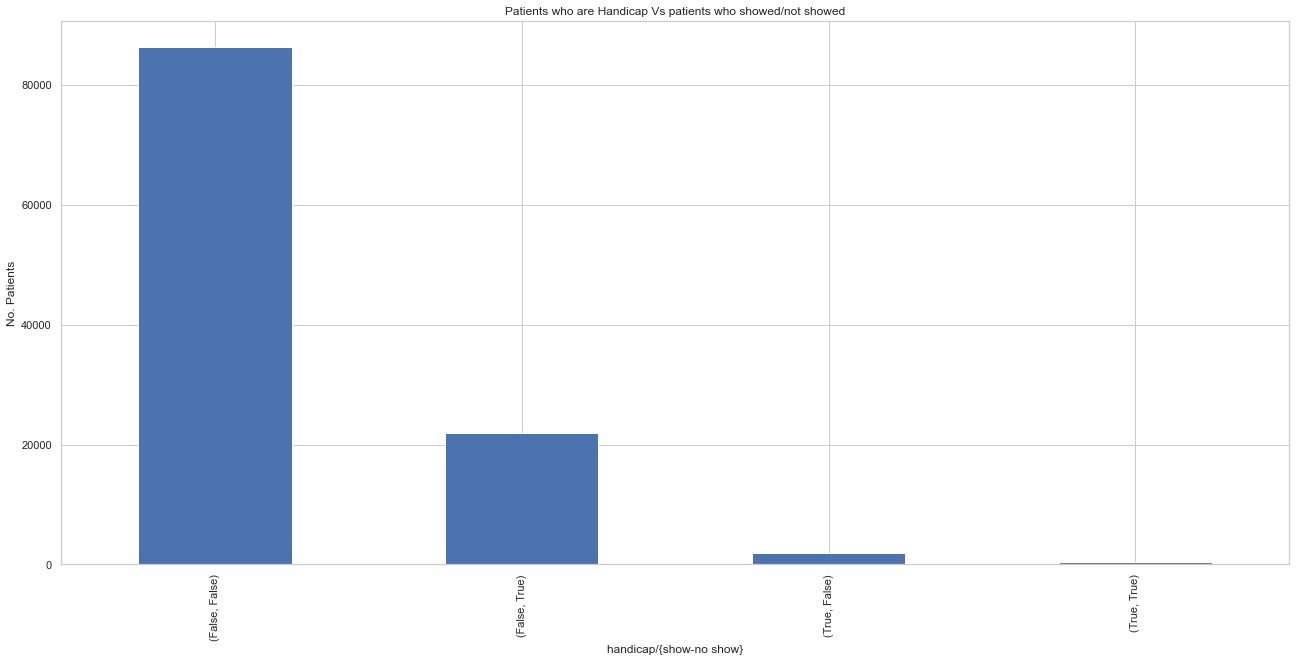

In [141]:
print(df.groupby('handicap')['no_show'].value_counts())
df.groupby('handicap')['no_show'].value_counts().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("handicap/{show-no show}")
plt.ylabel("No. Patients")
plt.title("Patients who are Handicap Vs patients who showed/not showed");



>**explanation**:This graph shows the overall view of patients with handicap relations. It can be noticed that most of the patients who showed up are not handicapped. Also, the number of patients who are handicapped and showed more than the number of people who did not show. But the graph illustrates that handicap does not affect the % of showing up generally.

False    1834
True      407
Name: no_show, dtype: int64


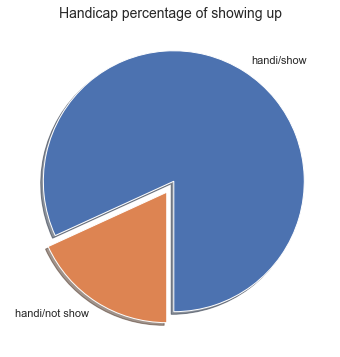

False    86373
True     21912
Name: no_show, dtype: int64


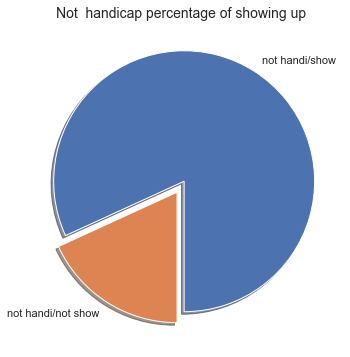

In [142]:
# Creating a mask for handicap/not handicap
not_handi= df.handicap == False
handi= df.handicap == True
#Using matplotlib
print(df.no_show[handi].value_counts())
pie, ax = plt.subplots(figsize=[10,6])
labels = ['handi/show', 'handi/not show']
plt.pie(x=df.no_show[handi].value_counts(), explode=[0.05]*2, labels=labels, pctdistance=0.5, shadow=True, startangle=270)
plt.title("Handicap percentage of showing up", fontsize=14);
plt.show()
print(df.no_show[not_handi].value_counts())
pie, ax = plt.subplots(figsize=[10,6])
labels = ['not handi/show', 'not handi/not show']
plt.pie(x=df.no_show[handi].value_counts(), explode=[0.05]*2, labels=labels, pctdistance=0.5, shadow=True, startangle=270)
plt.title("Not  handicap percentage of showing up", fontsize=14);
plt.show()

>**explanation**:These graphs show in more depth that handicapped people had established a high % of showing up, not the opposite. 

alcoholism  no_show
False       False      85524
            True       21642
True        False       2683
            True         677
Name: no_show, dtype: int64


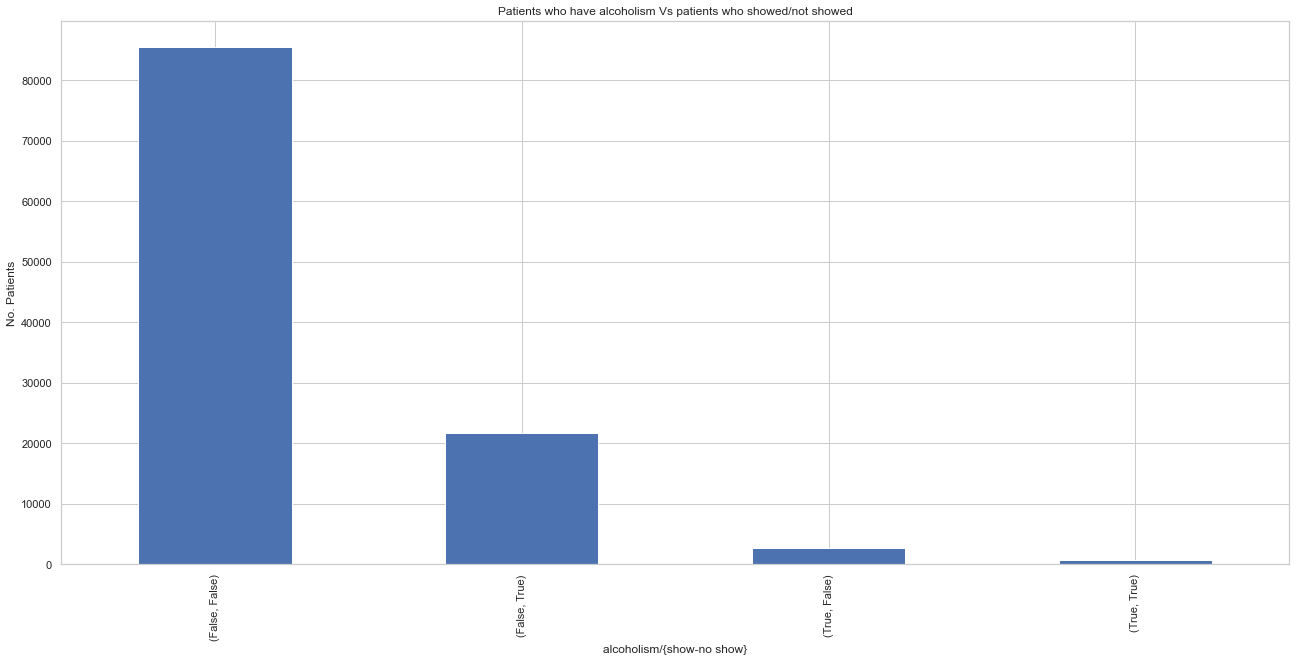

In [143]:
#Alcoholism
print(df.groupby('alcoholism')['no_show'].value_counts())
df.groupby('alcoholism')['no_show'].value_counts().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("alcoholism/{show-no show}")
plt.ylabel("No. Patients")
plt.title("Patients who have alcoholism Vs patients who showed/not showed");

>**explanation**:This graph shows the overall view of patients with alcoholism relations. It can be noticed that most of the patients who showed up not alcoholism. Also, the number of patients who alcoholism and showed more than the number of people who did not show. But the graph illustrates that alcoholism does not affect the % of showing up generally.

False    2683
True      677
Name: no_show, dtype: int64


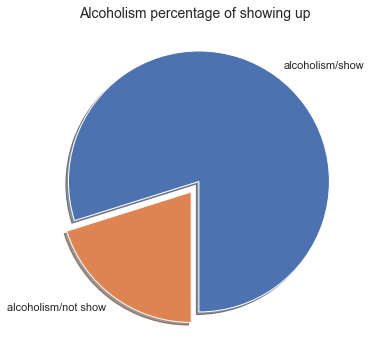

False    85524
True     21642
Name: no_show, dtype: int64


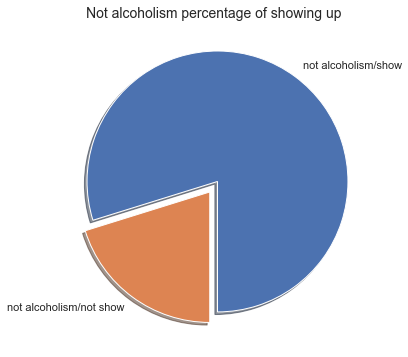

In [144]:
# Creating a mask for handicap/not handicap
not_alcoholism= df.alcoholism == False
alcoholism= df.alcoholism == True
#Using matplotlib
print(df.no_show[alcoholism].value_counts())
pie, ax = plt.subplots(figsize=[10,6])
labels = ['alcoholism/show', 'alcoholism/not show']
plt.pie(x=df.no_show[alcoholism].value_counts(), explode=[0.05]*2, labels=labels, pctdistance=0.5, shadow=True, startangle=270)
plt.title("Alcoholism percentage of showing up", fontsize=14);
plt.show()
print(df.no_show[not_alcoholism].value_counts())
pie, ax = plt.subplots(figsize=[10,6])
labels = ['not alcoholism/show', 'not alcoholism/not show']
plt.pie(x=df.no_show[not_alcoholism].value_counts(), explode=[0.05]*2, labels=labels, pctdistance=0.5, shadow=True, startangle=270)
plt.title("Not alcoholism percentage of showing up", fontsize=14);
plt.show()

>**explanation**:These graphs show in more depth that alcoholism people had established a high % of showing up, not the opposite. 

<a id='conclusions'></a>
## Conclusions

### Findings and Results
>After conducting the required analysis to answer the questions of this analysis,  the findings are summarized as follow:

>1. The first finding states that weekend days such as Saturday scored the lowest appointments and the lowest attendance with only 30 patients. On the other hand, weekdays, especially Wednesday and Tuesday, recorded the highest numbers of patients. All the weekends days approximately showed the same rate of no-show patients. Hence, patients do not prefer weekends over weekdays.

>2. The second finding states that 58.31% of patients had shown up when the appointment day was not the same day of scheduling, and 41.68% showed up when the appointment day was the same day of scheduling; hence we can say that patients prefer to schedule their appointments earlier. 71964 patients set their appointment earlier than their appointment day, with 58.31% of showing up. 
But there were 38562 patients who set their appointment the same day of their appointment day with 41.68 % pf showing up.

>3. The third finding was the most surprising one because it showed that the mean of the number of people who received SMS and showed up is 0.29. On the other hand, the mean number of people who received SMS and were not shown is 0.43. hence there is no direct relation between SMS notifications and the percentage of showing up.

>4. The fourth finding showed that both males and females had the same attitude of showing up and not showing up. Therefore, gender does not play any role in committing to a medical appointment.

>5. The fifth finding showed that:
>- Scholarship does not affect the probability of showing up because 8283 patients who had this scholarship showed up while 2578 did not.
>- The mean age was 37 years old. The distribution of patients who had a higher showing up percentage fall between (37-100), which could mean that more aged people are more care eager about their medical appointments.
>- Handicapping did not show any effect on showing up probability because 1834 of handicap people showed up in a total of 2241 patients.
>- Alcoholism did not show a direct effect on patients showing up percentage because 2683 patients showed up from a total of 3360 patients.

#### Limitations
>The records of this data set did not directly relate to the probability of showing up that could help the administration improve the percentage of patients. I assume that there could be some human error mistakes while recording because the most supprised result is that SMS notifications did not enhance the portion of patients to show up. Something wrong needs to be fixed because we all tend to keep our appointments when we recive reminders. Some shortage needs to be fixed to improve the medical system and encourage patients to keep their appoitments by an intelligent automated system that remind the patients of their appointment's detail via SMS and emails.  

> Noran Tarek/ Data analysis professional track. 